<a href="https://colab.research.google.com/github/Bhumika2104/Stock-Market-Analysis/blob/main/StockMarket_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: name 'true' is not defined

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# Import yfinance for stock data
import yfinance as yf

# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas.testing import assert_frame_equal

# For time stamps
from datetime import datetime

In [ ]:
# Tech stocks used for the analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    # Set yfinance as the Stock data
    globals()[stock] = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.sort_index(inplace=True)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700,APPLE
2024-09-26,165.029999,165.500000,163.500000,163.830002,163.830002,18234500,GOOGLE
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14888600,MICROSOFT
2024-09-27,190.679993,190.899994,187.339996,187.970001,187.970001,35964900,AMAZON
2024-09-27,163.910004,166.970001,163.830002,165.289993,165.289993,13593000,GOOGLE
2024-09-27,228.460007,229.520004,227.300003,227.789993,227.789993,33993600,APPLE
2024-09-30,164.774994,166.440002,164.639999,165.421997,165.421997,2631354,GOOGLE
2024-09-30,230.154999,232.341202,229.654999,230.580002,230.580002,10586424,APPLE
2024-09-30,428.200012,429.570496,425.665009,426.190002,426.190002,2992761,MICROSOFT


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,194.074801,195.878451,192.445319,194.273068,193.824056,5.931023e+07
std,20.023614,20.251799,19.589878,19.927779,20.116762,2.989221e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,1.058642e+07
25%,176.779999,179.065002,176.005005,178.695000,177.874809,4.447420e+07
50%,189.839996,190.960007,188.649994,189.789993,189.231918,5.269690e+07
75%,213.889999,216.764999,211.760002,214.170006,213.922394,6.515995e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.186799e+08


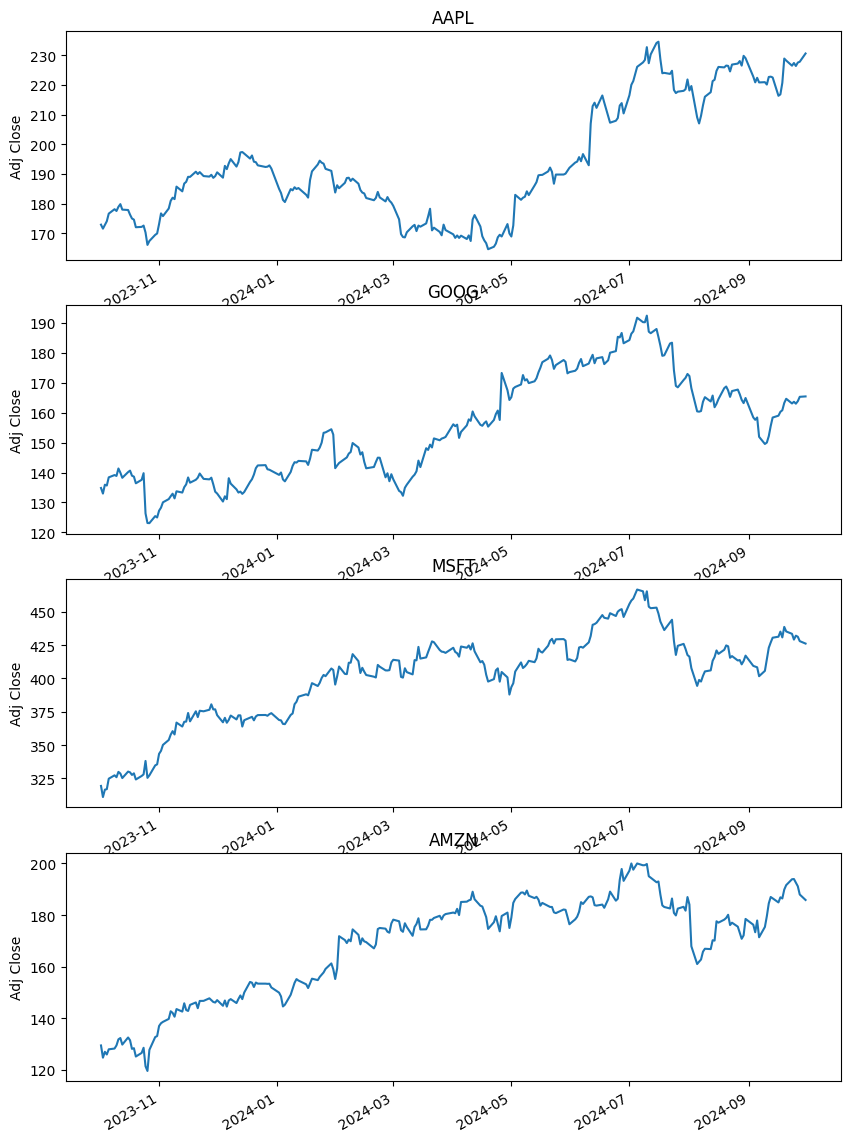

In [ ]:
# History of the closing price

plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

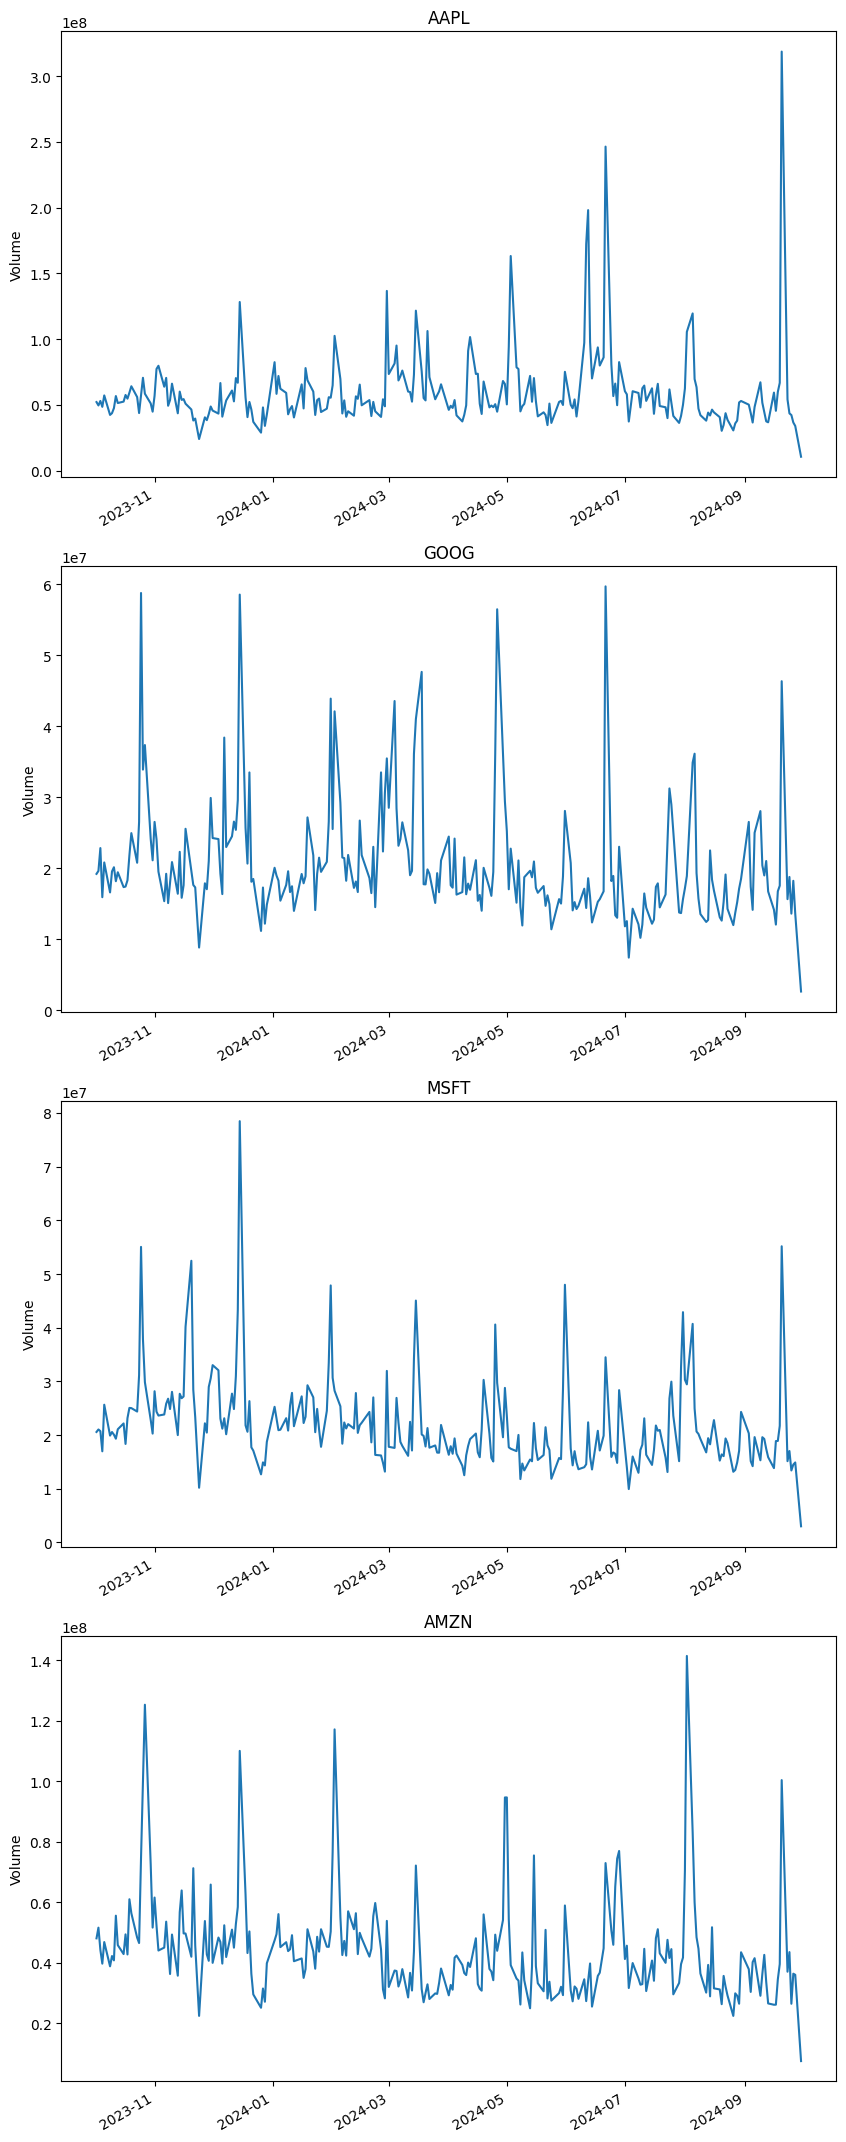

In [ ]:
# Total volume of stock being traded each day
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=2.25, bottom=2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

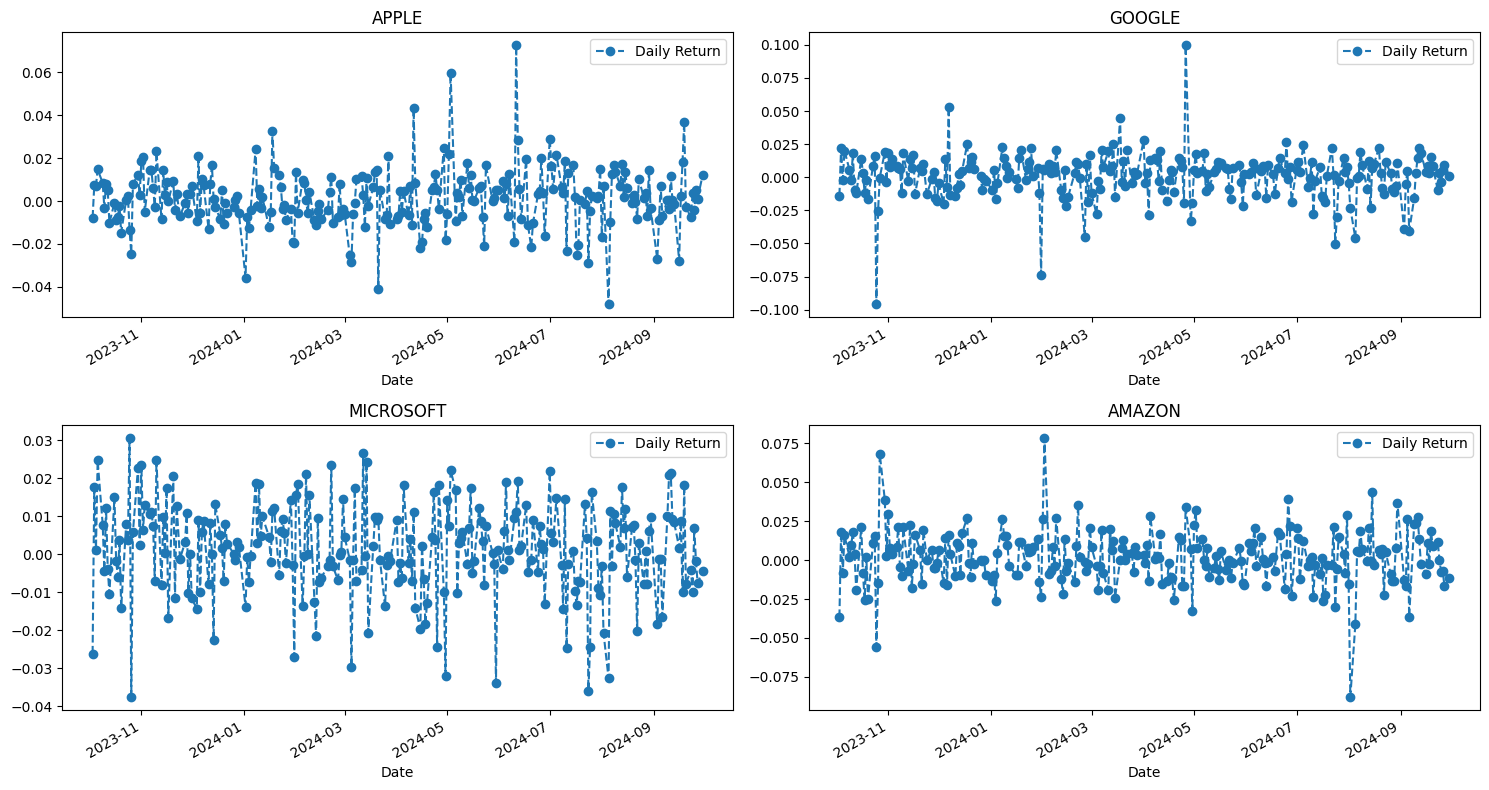

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Let's take a quick look
closing_df.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-02 00:00:00+00:00,172.865433,129.460007,134.838852,319.402557
2023-10-03 00:00:00+00:00,171.522308,124.720001,132.973434,311.055237
2023-10-04 00:00:00+00:00,172.775894,127.000000,135.936157,316.583710
2023-10-05 00:00:00+00:00,174.019531,125.959999,135.656860,316.980713
2023-10-06 00:00:00+00:00,176.586411,127.959999,138.390137,324.821899


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-10-03 00:00:00+00:00,-0.007770,-0.036614,-0.013834,-0.026134
2023-10-04 00:00:00+00:00,0.007309,0.018281,0.022281,0.017773
2023-10-05 00:00:00+00:00,0.007198,-0.008189,-0.002055,0.001254
2023-10-06 00:00:00+00:00,0.014751,0.015878,0.020148,0.024737


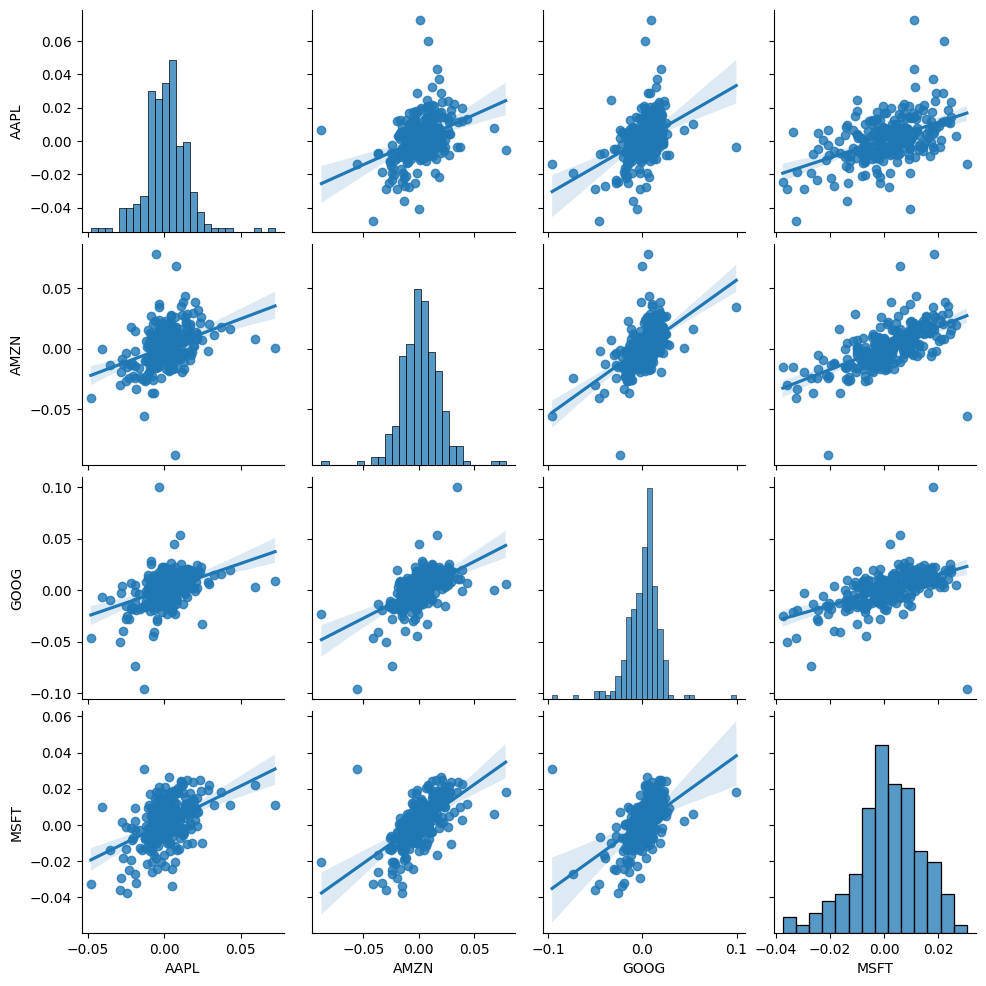

In [ ]:
# Calling pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets, kind='reg')

<Axes: xlabel='Ticker', ylabel='Ticker'>

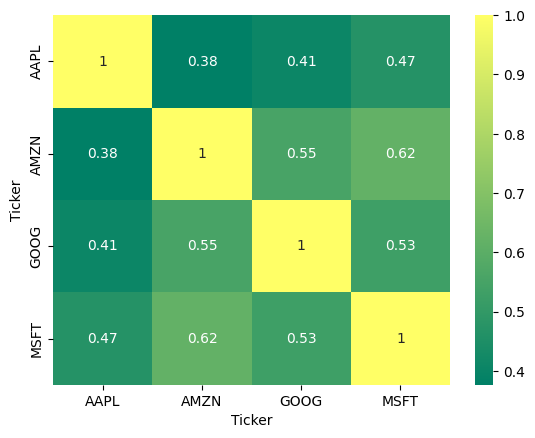

In [ ]:
# Using seaborn for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: xlabel='Ticker', ylabel='Ticker'>

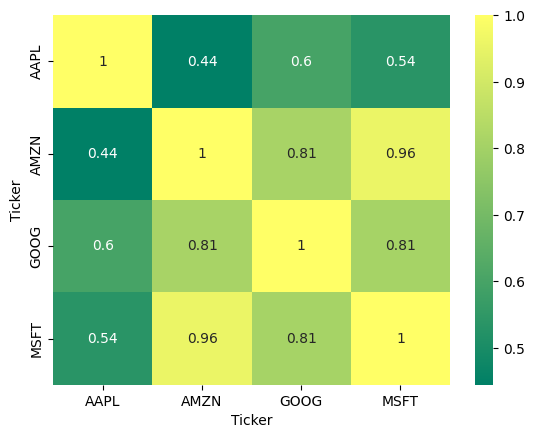

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

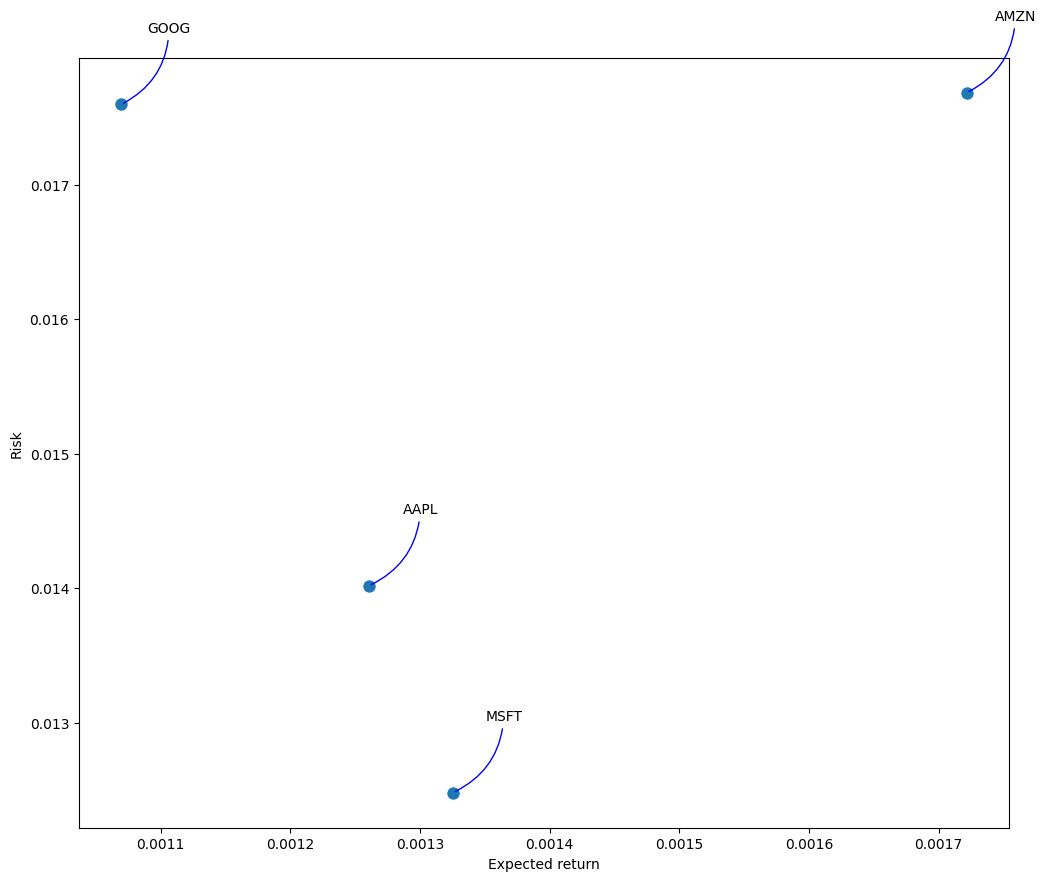

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:

# Get the stock quote for Apple (AAPL) using yfinance
df = yf.download('AAPL', start='2012-01-01', end=end)
#Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469277,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607717,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739512,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719307,394024400
...,...,...,...,...,...,...
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700


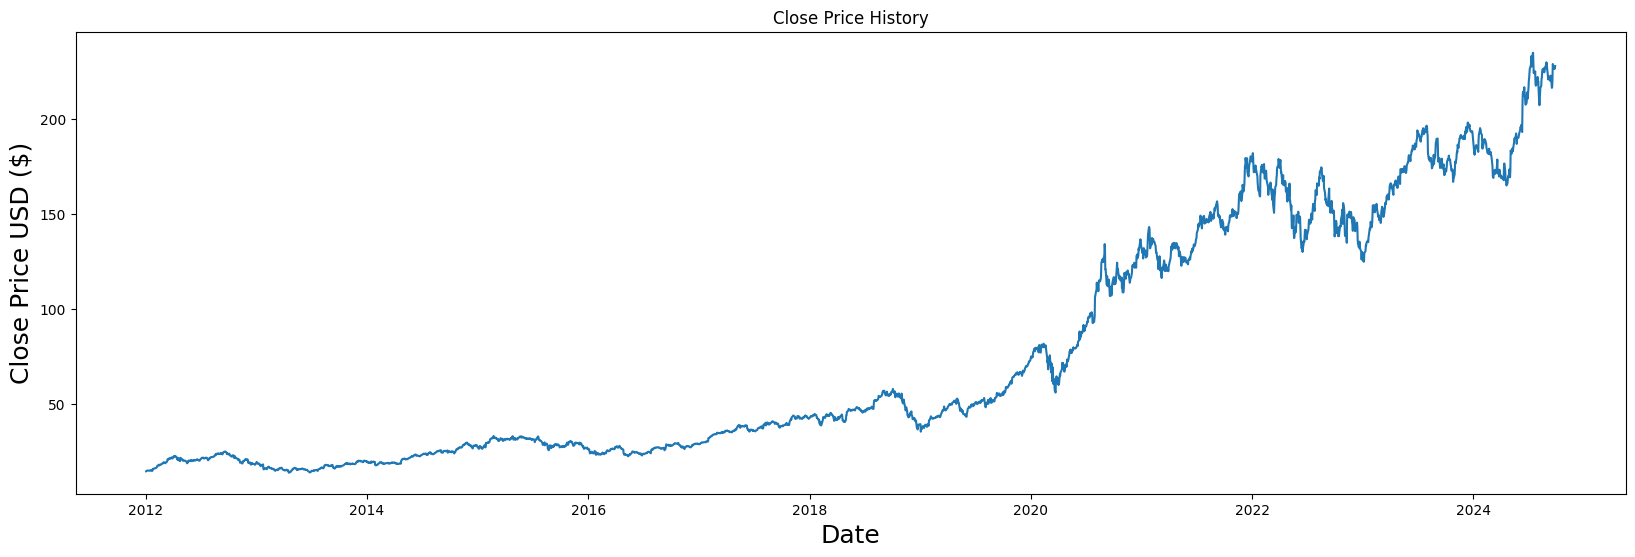

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()